In [27]:
import numpy as np
import numpy.linalg as la

In [28]:
earth_mass = 5.97e24 # kg
moon_mass = 7.35e22 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

<tr>
<td> <img src="media/gravity.png" alt="Drawing" style="width: 450px;"/> </td>
<td> <img src="media/acc_diffeq.png" alt="Drawing" style="width: 450px;"/> </td>
</tr>


In [29]:
def acceleration(moon_position, spaceship_position):
    #nonsense = numpy.linalg.norm(moon_position) * spaceship_position
    spaceship_moon_vector = moon_position - spaceship_position
    
    d_sm = la.norm(spaceship_moon_vector)
    d_es = la.norm(spaceship_position)
    d_em = la.norm(moon_position)

    
    x_s = (spaceship_position * -1) / la.norm(spaceship_position)
    x_m = (moon_position * -1) / la.norm(moon_position)
    
    x_moon = (x_m - x_s) / d_sm
    
    factor_one = gravitational_constant * (earth_mass/(d_es**2)) * x_s
    
    factor_two = gravitational_constant * (moon_mass/(d_em**2)) * x_moon
    
    acceleration = factor_one + factor_two
    
    return acceleration

In [30]:
moon = np.array([3,2])
space = np.array([2, -1])

In [31]:
acceleration(moon, space)

array([-7.12245640e+13,  3.54965199e+13])

The equation for the motion of the moon around earth, considering it is completely round is:

27 = periodo of the moon around earth.

t = time

x = 4e8 * cos(2πt/27)

y = 4e8 * sin(2πt/27)

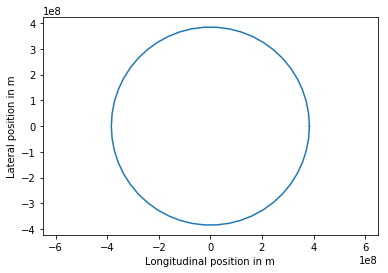

In [20]:
# PROBLEM 1
#
# Modify the orbit function below to model
# one revolution of the moon around the earth,
# assuming that the orbit is circular.
#
# Use the math.cos(angle) and math.sin(angle) 
# functions in order to accomplish this.

import math
import matplotlib.pyplot as plt
#from udacityplots import *

moon_distance = 384e6 # m

def orbit():
    num_steps = 50
    pos = numpy.zeros([num_steps + 1, 2])
    
    t = 1
    
    # x = 4e8 * math.cos((2 * math.pi * t)/(27))
    # y = 4e8 * math.sin((2 * math.pi * t)/(27))
    
    for i in range(num_steps + 1):
        pos[i][0] = moon_distance * math.cos((2. * math.pi * (i))/num_steps)  # x
        pos[i][1] = moon_distance * math.sin((2. * math.pi * (i))/num_steps) # y

    return pos

x = orbit()

#@show_plot
def plot_me():
    plt.axis('equal')
    plt.plot(x[:, 0], x[:, 1])
    axes = plt.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
plot_me()


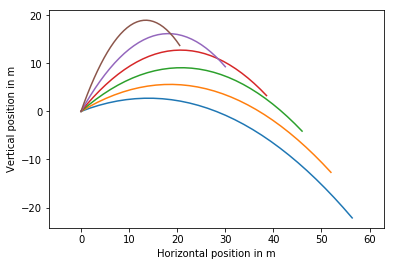

In [70]:
# PROBLEM 2
#
# Modify the trajectory function below to 
# plot the trajectory of several particles. 
# Each trajectory starts at the point (0,0) 
# given initial speed in the direction 
# specified by the angle. Use the Forward 
# Euler Method to accomplish this.

import math
# from udacityplots import *

import numpy
import numpy as np

h = 0.1 # s
g = 9.81 # m / s2
acceleration = numpy.array([0., -g])
initial_speed = 20. # m / s

#@show_plot
def trajectory():
    angles = numpy.linspace(20., 70., 6)

    num_steps = 30
    x = numpy.zeros([num_steps + 1, 2])
    v = numpy.zeros([num_steps + 1, 2])

    for angle in angles:
        
        # speed_unit = vector / np.linalg.norm(vector)
        
        speed0_x = math.cos(math.radians(angle)) * initial_speed
        speed0_y = math.sin(math.radians(angle)) * initial_speed
        
        v[0] = [speed0_x, speed0_y]
        
        speed0_unit = v[0] / np.linalg.norm(v[0])
        
        for step in range(num_steps):
            x[step + 1] = x[step] + h * v[step]  # x[step] + h * v[step]
            v[step + 1] = v[step] + h * acceleration # -1 not needed, already in initial declaration
        ###Your code here.

        matplotlib.pyplot.plot(x[:, 0], x[:, 1])
        
        
    matplotlib.pyplot.axis('equal')
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Horizontal position in m')
    axes.set_ylabel('Vertical position in m')
    plt.show()
    # return x, v

trajectory()


